First, we need to import nesassary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

The separation energy is the minimum energy needed to remove a particlefrom a nucleus.In our model, we will define our own seperation energy as $S_n = S_0+\sum S_k(A_0-A)^k$. In the follow calculation, we will fix the atomic number Z, so $A-A_0$ will become $N_0-N$. We can choose the $N_0$ as we need. In the following example, We will use 40 as $N_0$ first. Now, let's consider a simple case, with k up to 2. So our separation energy will be $S_n = S_0 + S_1(N_0-N) + S_2(N_0-N)^2$. We can define our $S_n$ as below. Where x is the array $S_n$'s, while N is the neutron number.

In [2]:
def sn_main(x, N, s_array):
    for i in range(len(s_array)):
        x += s_array[i] * np.power(N[0] - N, i)

In reality, we also need to add the pairing and shell effects to the separation energy. Let's define the pairing function first. Pair function: when N is even, Pair function add a constant value(delta, which can be define later) to x, otherwise deduct a delta. 

In [3]:
def sn_pair(x, N, delta):
    for i in range(len(x)):
        if (N[i] % 2) == 0:
            x[i] += delta
        else:
            x[i] -= delta

Then let's consider the shell effects. Shell function: when N is larger than the magic number (28, 50, 82 ...), the total sn function will decrease by a constant, which we can input this value to the array *magic*.  

In [4]:
def sn_shell(x, N, magic):
    for i in range(len(magic)):
        x -= magic[i][0] * np.heaviside(N - magic[i][1], 0)

Then, we will include those effects together to our main separation function.

In [5]:
def sn(N, s_array, delta, magic):
    result = np.zeros(len(N))

    sn_main(result, N, s_array)
    sn_pair(result, N, delta)
    sn_shell(result, N, magic)

    return result

In order to get a movie, let's first create a figure with labels.

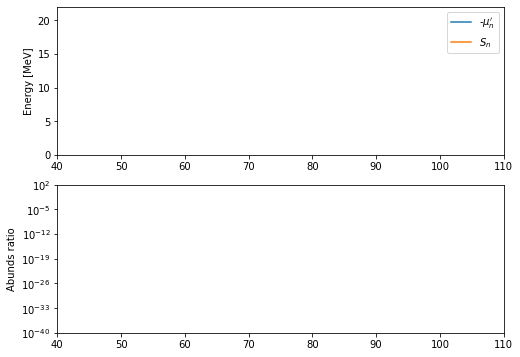

In [6]:
fig = plt.figure(figsize=(8,6))

ax1 = plt.subplot(211)

ax1.set_ylabel(r'Energy [MeV]')
ax1.set_xlim([40,110])
ax1.set_ylim([0,22])
txt_title = ax1.set_title('',fontsize=10)

line1, = ax1.plot([], [], label = r'-$\mu_n^{\prime}$')
line2, = ax1.plot([], [], label = r'$S_n$')
ax1.legend()

ax2 = plt.subplot(212)

ax2.set_ylabel(r'Abunds ratio')
ax2.set_xlim([40,110])
ax2.set_ylim([1.e-40,1.e2])
ax2.set_yscale('log')
line3, = ax2.plot([], [], label = r'Abunds ratio')
#ax2.legend()

When we have the separation function, we can integrate it to get the (ng)-(gn) equilibrium abundance ratio. When integrating $S_n$, we need define some integral functions that will be used later. First, Pi function

In [7]:
def Pi(x):
    if (x % 2) == 0:
        return(0)
    else:
        return(1)

When we integrate the sn_pair, we will need this Pi function, so the integral function is shown below.

In [8]:
def pair_inte(N, delta):
    Fp = []
    for n in range (len(N)):
        fp = delta*(-1)**(N[0]+1)*Pi(n-N[0])
        Fp.append(fp)
    Pair1 = np.array(Fp)
    return (Pair1)

When we incorprate the shell effects to our abundance ratio, we need to add the shell term to the abundances function.

In [9]:
def shell_inte(N, magic):  
    shell = np.zeros(len(N))
    for i in range (len(magic)):
        shell += magic[i][0] * np.heaviside(N - magic[i][1], 0)
    return shell

In [10]:
def drawframe(i):
    T_9 = t_9[i]
    mu_n = -Mu_n[i]*N**0
    line1.set_data(N,-mu_n)
    line2.set_data(N,sn)
    txt_title.set_text(r"$T_9$ = {T_9} [MeV/k] ;  $-\mu_n'$ = {mu_n} [MeV]".format(T_9 = "%.1f" %T_9, mu_n = Mu_n[i]))
    
    f = -((s_array[1]*11.609)/(2*T_9))*((N-N[0])-(s_array[0] - shell + mu_n)/s_array[1]+1/2)**2
    f_0 =-((s_array[1]*11.609)/(2*T_9))
    f_pair = 11.609*(Pair1)/T_9 
    F = math.e**(f-f_0+f_pair)
    line3.set_data(N,F)                  
    return (line1, line2, line3)

Now, let's input the neutron number N, delta and magic numbers where shell effects.

In [11]:
N = np.arange(40,110)
s_array = [20, 0.25, 0.001]
delta = 1.5
magic = [(3, 50), (3, 82)]

With those input data above, we can get the results of our pre-defined function, which will be plotted in the figure.

In [12]:
sn = sn(N, s_array, delta, magic)
shell = shell_inte(N, magic)
Pair1 = pair_inte(N,delta)

Another two important indexs are the temprature($T_9$ [MeV/k]) and chemical potential $\mu_n'$ [MeV], which will change the plot significantly. Simply speaking, when $T_9$ is fixed, and the $\mu_n'$ value is equal to $S_n$, this intersection is the location of the abundance peak. When $mu_n'$ is fixed, with a decreasing $T_9$, you will see a narrowing Gaussian distribution. Of course, we can make both parametes changing.

In [13]:
t_9 = 2*np.ones(20)
Mu_n = np.arange(0,20)
#t_9 = np.linspace(2,0.1,20)
#Mu_n = 12*np.ones(20)

In [14]:
from matplotlib import animation
anim = animation.FuncAnimation(fig, drawframe, frames=20, blit=True, repeat=False)

In [15]:
from IPython.display import HTML
HTML(anim.to_html5_video())